## Session 1: HPC and the Julia Framework

<br> OBJECTIVE: Confirm Julia framework and Base speed
<br>
•  KR1: Use @code_* to examine a simple function. The * is replaceable by native, typed, warntype, and others. Discover them.
<br> •  KR2: Demonstrate that Julia is able to determine constants in codes.
<br> •  KR3: Demonstrate Julia's type-inference and multiple dispatch.
<br> •  KR3: Show the difference, if any, between your own sum function my_sum(x::Vector) and @time. Use a for-loop for your customized sum function.
<br> •  KR4: Replicate plotting the Mandelbrot. Use a separate file Mandelbrot.jl to contain the function code. Use include() function to load the file.
<br> •  KR5: Plot of the time it takes for the function to run using @time macro for the given grid size n.
<br> •  KR6: Disuss the computational complexity of the Madelbrot function you made based onKR5. What is the best @time output to use for this?

This is my first time formally evaluating the high performance computing capability of any coding language. Also, I am hoping to go around and discover how the general framework for Julia functions.

First, let's request for the documentation of the said commands:

### KR1

In [92]:
?@code_native

```
@code_native
```

Evaluates the arguments to the function or macro call, determines their types, and calls [`code_native`](@ref) on the resulting expression.

Set the optional keyword argument `debuginfo` by putting it before the function call, like this:

```
@code_native debuginfo=:default f(x)
```

`debuginfo` may be one of `:source` (default) or `:none`, to specify the verbosity of code comments.


In [93]:
@code_native 14^3

	.text
; ┌ @ intfuncs.jl:290 within `^'
	pushq	%rbp
	movq	%rsp, %rbp
	subq	$32, %rsp
	movabsq	$power_by_squaring, %rax
	callq	*%rax
	addq	$32, %rsp
	popq	%rbp
	retq
	nopw	(%rax,%rax)
; └


In [94]:
@code_native 14.0^3

	.text
; ┌ @ math.jl:914 within `^'
	pushq	%rbp
	movq	%rsp, %rbp
; │ @ math.jl:915 within `^'
	leaq	1(%rdx), %rax
	cmpq	$4, %rax
	ja	L51
; │ @ math.jl within `^'
	movabsq	$.rodata.cst8, %rcx
	vmovsd	(%rcx), %xmm1                   # xmm1 = mem[0],zero
	movabsq	$.rodata, %rdx
	jmpq	*(%rdx,%rax,8)
	vmovsd	(%rcx), %xmm1                   # xmm1 = mem[0],zero
; │ @ math.jl:915 within `^'
; │┌ @ number.jl:217 within `inv'
; ││┌ @ float.jl:335 within `/'
	vdivsd	%xmm0, %xmm1, %xmm0
; │└└
	popq	%rbp
	retq
; │ @ math.jl:920 within `^'
; │┌ @ float.jl:94 within `Float64'
L51:
	vcvtsi2sd	%rdx, %xmm1, %xmm1
	movabsq	$pow, %rax
; │└
	popq	%rbp
	jmpq	*%rax
; │ @ math.jl within `^'
	vmovaps	%xmm0, %xmm1
; │ @ math.jl:916 within `^'
	vmovaps	%xmm1, %xmm0
	popq	%rbp
	retq
; │ @ math.jl:918 within `^'
; │┌ @ float.jl:332 within `*'
	vmulsd	%xmm0, %xmm0, %xmm0
; │└
	popq	%rbp
	retq
; │ @ math.jl:919 within `^'
; │┌ @ operators.jl:560 within `*' @ float.jl:332
	vmulsd	%xmm0, %xmm0, %xmm1
	vmulsd	%xmm0, %

In [95]:
#@code_native debuginfo=:default f(x)

In [96]:
?@code_typed

```
@code_typed
```

Evaluates the arguments to the function or macro call, determines their types, and calls [`code_typed`](@ref) on the resulting expression. Use the optional argument `optimize` with

```
@code_typed optimize=true foo(x)
```

to control whether additional optimizations, such as inlining, are also applied.


In [97]:
@code_typed 14^3

CodeInfo(
1 ─ %1 = invoke Base.power_by_squaring(_2::Int64, _3::Int64)::Int64
└──      return %1
) => Int64

In [98]:
@code_typed 14.0^3

CodeInfo(
1 ── %1  = (y === -1)::Bool
└───       goto #3 if not %1
2 ── %3  = Base.div_float(1.0, x)::Float64
└───       return %3
3 ── %5  = (y === 0)::Bool
└───       goto #5 if not %5
4 ──       return 1.0
5 ── %8  = (y === 1)::Bool
└───       goto #7 if not %8
6 ──       return x
7 ── %11 = (y === 2)::Bool
└───       goto #9 if not %11
8 ── %13 = Base.mul_float(x, x)::Float64
└───       return %13
9 ── %15 = (y === 3)::Bool
└───       goto #11 if not %15
10 ─ %17 = Base.mul_float(x, x)::Float64
│    %18 = Base.mul_float(%17, x)::Float64
└───       return %18
11 ─ %20 = Base.sitofp(Float64, y)::Float64
│    %21 = $(Expr(:foreigncall, "llvm.pow.f64", Float64, svec(Float64, Float64), 0, :(:llvmcall), Core.Argument(2), :(%20), :(%20), Core.Argument(2)))::Float64
└───       return %21
) => Float64

In [99]:
pi

π = 3.1415926535897...

In [100]:
?@code_warntype

```
@code_warntype
```

Evaluates the arguments to the function or macro call, determines their types, and calls [`code_warntype`](@ref) on the resulting expression.


In [101]:
@code_warntype 14^3

Variables
  #self#::Core.Const(^)
  x::Int64
  p::Int64

Body::Int64
1 ─ %1 = Base.power_by_squaring(x, p)::Int64
└──      return %1


In [102]:
@code_warntype 14.0^(3.0)

Variables
  #self#::Core.Const(^)
  x::Float64
  y::Float64
  z::Float64

Body::Float64
1 ─       nothing
│   %2  = Base.cconvert(Base.Math.Float64, x)::Float64
│   %3  = Base.cconvert(Base.Math.Float64, y)::Float64
│   %4  = Base.unsafe_convert(Base.Math.Float64, %2)::Float64
│   %5  = Base.unsafe_convert(Base.Math.Float64, %3)::Float64
│         (z = $(Expr(:foreigncall, "llvm.pow.f64", Float64, svec(Float64, Float64), 0, :(:llvmcall), :(%4), :(%5), :(%3), :(%2))))
│   %7  = Base.Math.isnan(z)::Bool
│   %8  = (x + y)::Float64
│   %9  = Base.Math.isnan(%8)::Bool
│   %10 = !%9::Bool
│   %11 = (%7 & %10)::Bool
└──       goto #3 if not %11
2 ─       Base.Math.throw_exp_domainerror(x)
3 ┄       return z


In [103]:
?code_llvm

search: code_llvm @code_llvm



```
code_llvm([io=stdout,], f, types; raw=false, dump_module=false, optimize=true, debuginfo=:default)
```

Prints the LLVM bitcodes generated for running the method matching the given generic function and type signature to `io`.

If the `optimize` keyword is unset, the code will be shown before LLVM optimizations. All metadata and dbg.* calls are removed from the printed bitcode. For the full IR, set the `raw` keyword to true. To dump the entire module that encapsulates the function (with declarations), set the `dump_module` keyword to true. Keyword argument `debuginfo` may be one of source (default) or none, to specify the verbosity of code comments.


## KR2

In [104]:
@code_warntype 14^pi

Variables
  #self#::Core.Const(^)
  x::Int64
  y::Core.Const(π)

Body::Float64
1 ─ %1 = Base.promote(x, y)::Core.PartialStruct(Tuple{Float64, Float64}, Any[Float64, Core.Const(3.141592653589793)])
│   %2 = Core._apply_iterate(Base.iterate, Base.:^, %1)::Float64
└──      return %2


In [105]:
f(x) = log(10.0)*x

f (generic function with 1 method)

In [106]:
@code_llvm f(4.0)

;  @ In[105]:1 within `f'
; Function Attrs: uwtable
define double @julia_f_3294(double %0) #0 {
top:
; ┌ @ float.jl:332 within `*'
   %1 = fmul double %0, 0x40026BB1BBB55516
; └
  ret double %1
}


This `   %1 = fmul double %0, 0x40026BB1BBB55516` represents the operation and `0x40026BB1BBB55516` is the code of the constant `log(10.0)`. Instead of performing the log operation, it just finds the value from it's database. In short, Julia is able to know where are the constants in our code and apply it to reduce the number of operations.

In [107]:
g(x) = x*log(x)

g (generic function with 1 method)

In [108]:
@code_llvm g(4.0)

;  @ In[107]:1 within `g'
; Function Attrs: uwtable
define double @julia_g_3296(double %0) #0 {
top:
  %1 = call double @j_log_3298(double %0) #0
; ┌ @ float.jl:332 within `*'
   %2 = fmul double %1, %0
; └
  ret double %2
}


In this particular function where constant is non-existent, Julia is forced to call the log operation as indicated by `  %1 = call double @j_log_2551(double %0) #0` before it executes the multiplication operation.

## KR3

It's better to check if the function already exists so that we can avoid overloading existing functions. For example, is there an existing function called `permute`?

In [109]:
?permute

search: permute! permutedims permutedims! PermutedDimsArray invpermute!

Couldn't find permute
Perhaps you meant permute!, promote or permutedims


No documentation found.

Binding `permute` does not exist.


If there isn't or the function you queried is slightly incorrect, Julia's help mode will give you suggestions.

In [110]:
?permute!;

In [111]:
permute!([1, 1, 3, 4],[2, 4, 3, 1]) 

4-element Vector{Int64}:
 1
 4
 3
 1

If there exists no such function, then we can define a general one and specialized one. From the discussion, these were the examples.

In [112]:
what(x) = "some type $(typeof(x))"
what(x::String) = "a string"
what(x::Number) = "a number"
what(x::Real) = "a real number"
what(x::Rational) = "a rational number"
what(x::Int) = "an integer"
what(x::Complex) = "a complex number"

what (generic function with 7 methods)

In [113]:
?what

search: what Cwchar_t whitebalance weighted_color_mean



No documentation found.

`what` is a `Function`.

```
# 7 methods for generic function "what":
[1] what(x::Complex) in Main at In[112]:7
[2] what(x::Rational) in Main at In[112]:5
[3] what(x::String) in Main at In[112]:2
[4] what(x::Int64) in Main at In[112]:6
[5] what(x::Real) in Main at In[112]:4
[6] what(x::Number) in Main at In[112]:3
[7] what(x) in Main at In[112]:1
```


In [114]:
println("4.0 is $(what(4.0)).")
println("4+2im is $(what(4+2im)).")

4.0 is a real number.
4+2im is a complex number.


## KR3

In [115]:
function my_sum(x::Vector)
    s = zero(eltype(x))
    for el in x
        s += el
    end
    return s
end

my_sum (generic function with 1 method)

In [116]:
x = rand(10_000_000);

In [117]:
@time my_sum(x)

  0.019811 seconds (4.35 k allocations: 228.282 KiB, 42.56% compilation time)


4.998978900996461e6

In [118]:
@time my_sum(x)

  0.012205 seconds (1 allocation: 16 bytes)


4.998978900996461e6

In [119]:
?sum(::AbstractArray)

```
sum(itr; [init])
```

Returns the sum of all elements in a collection.

The return type is `Int` for signed integers of less than system word size, and `UInt` for unsigned integers of less than system word size.  For all other arguments, a common return type is found to which all arguments are promoted.

The value returned for empty `itr` can be specified by `init`. It must be the additive identity (i.e. zero) as it is unspecified whether `init` is used for non-empty collections.

!!! compat "Julia 1.6"
    Keyword argument `init` requires Julia 1.6 or later.


# Examples

```jldoctest
julia> sum(1:20)
210

julia> sum(1:20; init = 0.0)
210.0
```

---

```
sum(A::AbstractArray; dims)
```

Sum elements of an array over the given dimensions.

# Examples

```jldoctest
julia> A = [1 2; 3 4]
2×2 Matrix{Int64}:
 1  2
 3  4

julia> sum(A, dims=1)
1×2 Matrix{Int64}:
 4  6

julia> sum(A, dims=2)
2×1 Matrix{Int64}:
 3
 7
```


In [120]:
@time sum(x)

  0.006328 seconds (1 allocation: 16 bytes)


4.998978900996365e6

In [121]:
@time sum(x)

  0.005627 seconds (1 allocation: 16 bytes)


4.998978900996365e6

## KR4

In [122]:
# function mandelbrot( c )
#     z = c
#     itrMax = 80
#     for in in 1:itrMax
#         if abs(z)>2
#             return n-1
#         end
#         z = z^2 + c
#     end
#     return itrMax
# end

In [123]:
include("Mandelbrot.jl")

mandelbrot

In [124]:
?mandelbrot

search: mandelbrot plotMandelbrot



```
mandelbrot( c )
```

Computes the number of evaluations of the following equation before the resulting complex number 'z' beginning with 'z=c'.

  * Input: 'c::Number'
  * Output: 'itrMax::??'

### Questions

  * What do you think is the output type of this function?
  * WHich of the part of the code determines the type?

Sometimes forcing the type of output can be an advantage.


In [125]:
include("PlotMandelbrot.jl")

plotMandelbrot (generic function with 2 methods)

In [126]:
?plotMandelbrot

search: plotMandelbrot



No documentation found.

`plotMandelbrot` is a `Function`.

```
# 2 methods for generic function "plotMandelbrot":
[1] plotMandelbrot(vrange::Tuple{Float64, Float64}; n) in Main at C:\Users\renep\Google Drive\MS Physics\2.1\Physics 215 - Julia\PlotMandelbrot.jl:16
[2] plotMandelbrot(xrange::Tuple{Float64, Float64}, yrange::Tuple{Float64, Float64}; n) in Main at C:\Users\renep\Google Drive\MS Physics\2.1\Physics 215 - Julia\PlotMandelbrot.jl:2
```


In [127]:
using Plots

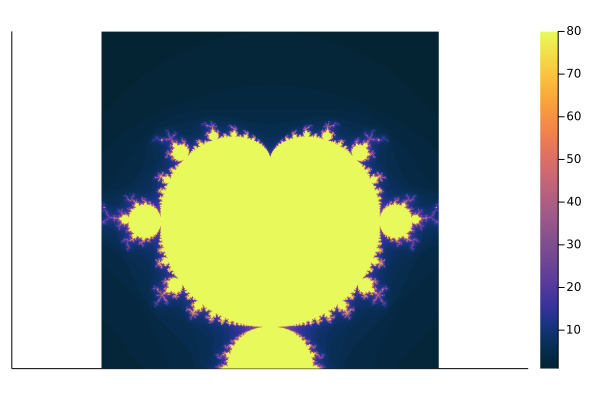

In [134]:
plotMandelbrot( (-1.0,1.0); n=1_000 )

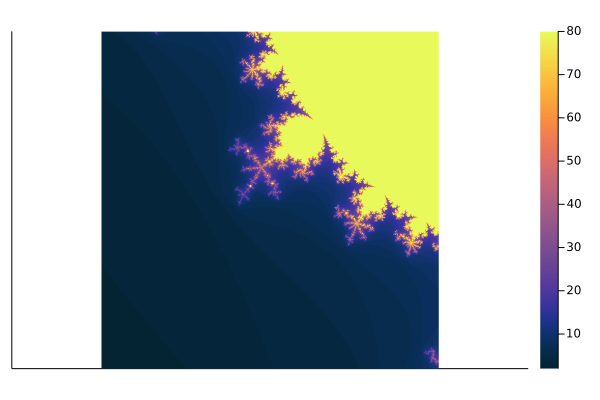

In [136]:
plotMandelbrot( (-0.95,-0.3); n=1_000 )

  0.329682 seconds (5.29 k allocations: 15.532 MiB)


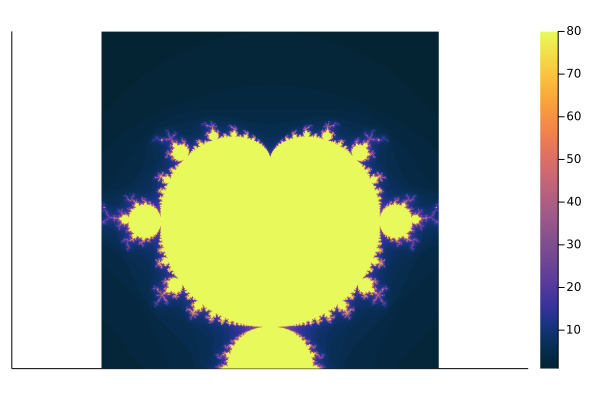

In [137]:
@time plotMandelbrot( (-1.0,1.0); n=1_000 )

  0.004157 seconds (1.69 k allocations: 280.945 KiB)


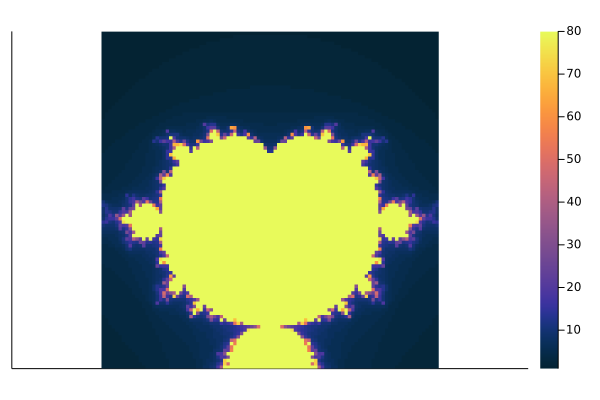

In [143]:
@time plotMandelbrot( (-1.0,1.0); n=1_00 )

  0.000675 seconds (1.32 k allocations: 110.664 KiB)


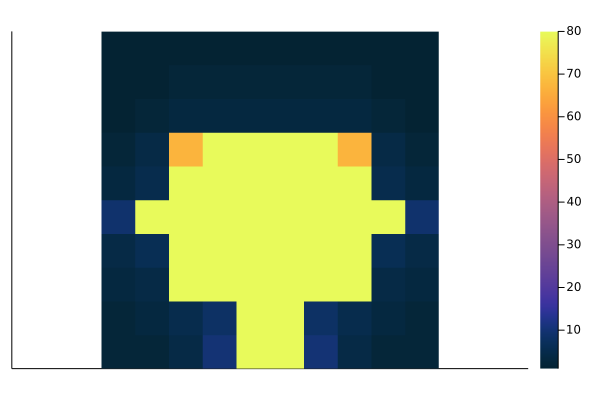

In [144]:
@time plotMandelbrot( (-1.0,1.0); n=1_0 )

 34.240575 seconds (41.30 k allocations: 1.492 GiB, 0.05% gc time)


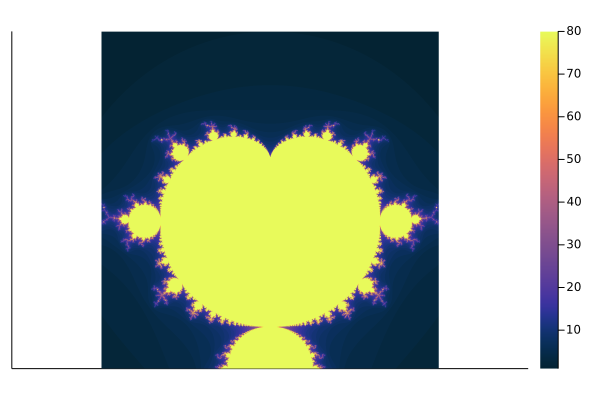

In [145]:
@time plotMandelbrot( (-1.0,1.0); n=10_000 )

In [129]:
# function plotMandelbrot( xrange::Tuple{Float64,Float64}, yrange::Tuple{Float64,Float64}; n=100 )
#     M = rand(n,n);
#     xval = range(xrange[1],xrange[2]; length=n );
#     yval = range(yrange[1],yrange[2]; length=n );
#     for i in 1:n, j in 1:n
#         M[i,j] = mandelbrot( xval[i] + im*yval[j] )
#     end
#     heatmap( M, c=:thermal
#         ,aspect_ratio=1.0
#         ,xaxis=nothing
#         ,yaxis=nothing
#     )
# end
# plotMandelbrot( vrange::Tuple{Float64,Float64}; n=100 ) = plotMandelbrot( vrange, vrange; n )

plotMandelbrot (generic function with 2 methods)

In [130]:
?plotMandelbrot

search: plotMandelbrot



No documentation found.

`plotMandelbrot` is a `Function`.

```
# 2 methods for generic function "plotMandelbrot":
[1] plotMandelbrot(vrange::Tuple{Float64, Float64}; n) in Main at In[129]:14
[2] plotMandelbrot(xrange::Tuple{Float64, Float64}, yrange::Tuple{Float64, Float64}; n) in Main at In[129]:1
```


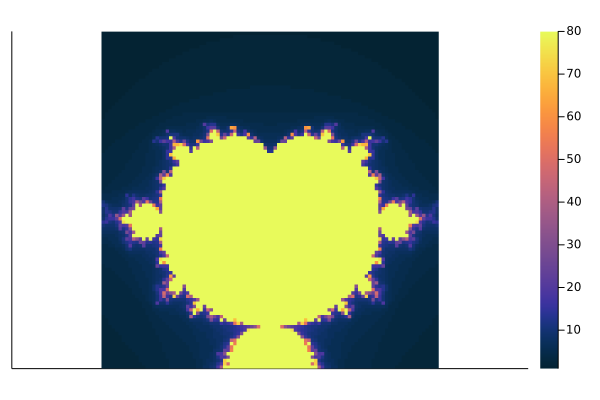

In [131]:
plotMandelbrot( (-1.0,1.0); n=100 )

On the first instance of using a user-defined function, the compilation time will take long.

In [132]:
function fib(n)
    x, y = 0,1
    while x < n
        x, y = y, x+y
        println(x)
    end
end

fib (generic function with 1 method)

In [133]:
methods(+)

# 206 methods for generic function "+":
[1] +(x::T, y::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} in Base at int.jl:87
[2] +(c::Union{UInt16, UInt32, UInt8}, x::BigInt) in Base.GMP at gmp.jl:528
[3] +(c::Union{Int16, Int32, Int8}, x::BigInt) in Base.GMP at gmp.jl:534
[4] +(c::Union{UInt16, UInt32, UInt8}, x::BigFloat) in Base.MPFR at mpfr.jl:376
[5] +(c::Union{Int16, Int32, Int8}, x::BigFloat) in Base.MPFR at mpfr.jl:384
[6] +(c::Union{Float16, Float32, Float64}, x::BigFloat) in Base.MPFR at mpfr.jl:392
[7] +(x::Union{Dates.CompoundPeriod, Dates.Period}) in Dates at C:\Users\renep\AppData\Local\Programs\Julia-1.6.2\share\julia\stdlib\v1.6\Dates\src\periods.jl:362
[8] +(a::Union{LMS, XYZ}, b::Union{LMS, XYZ}) in Colors at C:\Users\renep\.julia\packages\Colors\yDxFN\src\algorithms.jl:4
[9] +(bb1::Measures.BoundingBox, bb2::Measures.BoundingBox) in Plots at C:\Users\renep\.julia\packages\Plots\J70Ph\src\layouts.jl:19
[10] +(A::LinearAlgebra.UpperHessenberg, B::LinearAlgebra.UpperHessenberg) in LinearAlgebra at C:\Users\renep\AppData\Local\Programs\Julia-1.6.2\share\julia\stdlib\v1.6\LinearAlgebra\src\hessenberg.jl:101
[11] +(H::LinearAlgebra.UpperHessenberg, J::LinearAlgebra.UniformScaling) in LinearAlgebra at C:\Users\renep\AppData\Local\Programs\Julia-1.6.2\share\julia\stdlib\v1.6\LinearAlgebra\src\hessenberg.jl:106
[12] +(a::Tuple{Vararg{Measures.Measure, N}}, b::Tuple{Vararg{Measures.Measure, N}}) where N in Measures at C:\Users\renep\.julia\packages\Measures\0Zkai\src\point.jl:21
[13] +(a::Tuple{Vararg{Measures.Measure, N}} where N, b::Tuple{Vararg{Measures.Measure, N}} where N) in Measures at C:\Users\renep\.julia\packages\Measures\0Zkai\src\point.jl:15
[14] +(h::GeometryBasics.HyperRectangle{N, T}, move::StaticArrays.StaticVector{N, T} where T) where {N, T} in GeometryBasics at C:\Users\renep\.julia\packages\GeometryBasics\WMp6v\src\primitives\rectangles.jl:273
[15] +(h::GeometryBasics.HyperRectangle{N, T}, move::Number) where {N, T} in GeometryBasics at C:\Users\renep\.julia\packages\GeometryBasics\WMp6v\src\primitives\rectangles.jl:267
[16] +(x::AbstractIrrational, y::AbstractIrrational) in Base at irrationals.jl:156
[17] +(x::T, y::Integer) where T<:AbstractChar in Base at char.jl:223
[18] +(x::P, y::P) where P<:Dates.Period in Dates at C:\Users\renep\AppData\Local\Programs\Julia-1.6.2\share\julia\stdlib\v1.6\Dates\src\periods.jl:79
[19] +(x::Dates.Period, y::Dates.Period) in Dates at C:\Users\renep\AppData\Local\Programs\Julia-1.6.2\share\julia\stdlib\v1.6\Dates\src\periods.jl:351
[20] +(y::Dates.Period, x::Dates.CompoundPeriod) in Dates at C:\Users\renep\AppData\Local\Programs\Julia-1.6.2\share\julia\stdlib\v1.6\Dates\src\periods.jl:353
[21] +(y::Dates.Period, x::Dates.TimeType) in Dates at C:\Users\renep\AppData\Local\Programs\Julia-1.6.2\share\julia\stdlib\v1.6\Dates\src\arithmetic.jl:85
[22] +(x::Dates.Period, r::AbstractRange{var"#s832"} where var"#s832"<:Dates.TimeType) in Dates at C:\Users\renep\AppData\Local\Programs\Julia-1.6.2\share\julia\stdlib\v1.6\Dates\src\ranges.jl:62
[23] +(y::Union{Dates.CompoundPeriod, Dates.Period}, x::AbstractArray{var"#s832", N} where {var"#s832"<:Dates.TimeType, N}) in Dates at C:\Users\renep\AppData\Local\Programs\Julia-1.6.2\share\julia\stdlib\v1.6\Dates\src\deprecated.jl:14
[24] +(A::LinearAlgebra.Bidiagonal, B::LinearAlgebra.Bidiagonal) in LinearAlgebra at C:\Users\renep\AppData\Local\Programs\Julia-1.6.2\share\julia\stdlib\v1.6\LinearAlgebra\src\bidiag.jl:354
[25] +(A::LinearAlgebra.Bidiagonal, B::LinearAlgebra.UpperTriangular) in LinearAlgebra at C:\Users\renep\AppData\Local\Programs\Julia-1.6.2\share\julia\stdlib\v1.6\LinearAlgebra\src\special.jl:94
[26] +(A::LinearAlgebra.Bidiagonal, B::LinearAlgebra.UnitUpperTriangular) in LinearAlgebra at C:\Users\renep\AppData\Local\Programs\Julia-1.6.2\share\julia\stdlib\v1.6\LinearAlgebra\src\special.jl:94
[27] +(A::LinearAlgebra.Bidiagonal, B::LinearAlgebra.LowerTriangular) in LinearA